# Super Fast Color Transfer
Ever looked up at the sky and got mesmerised by the clouds? Only if now it could be a bit more orange like it was that morning or maybe a little bit purple like that evening.
Well in this article I demonstrate an algorithm implemented in python using opencv to transfer the colors of one picture to another.


<h3>This is an image taken round 6 pm in my college.</h3>
<img src="Images/evening1.jpg"></img>

<h3>This is an image I took in my residential complex.</h3>
<img src="Images/home.jpg"><img>

Now I am not a designer or someone very familiar with photoshop. Therefore I am going to use an algorithm to do the color transfer.

I am not going to use any complex code to achieve this task but rather very simple statistical operations and their operations to achieve my purpose.
Those are <strong>mean and standard deviation</strong>.

This implementation is very loosely based on Color Transfer between Images by <strong>Reinhard et al,2001.</strong>
In this paper, Reinhard and the colleagues demonstrate that by utilising the L*a*b color space and the mean and standard deviation of each L*,a* and b* channel, respectively, that the color can be transferred between two images.


## ALGORITHM
The algorithm is as follows:
<ul>
    <li>Step-1:</li> Input a source and a a target image.
    The source image contains the color space you want your target image to mimic.
    <li>Step-2:</li> Convert both the images to the L*a*b color space. This color space does a substantially better job mimicking how humans interpret color than the standard RGB color space, and as you'll see, works very well for data transfer.
    <li>Step-3:</li> Split the channels for both the source and the target.
    <li>Step-4:</li> Compute the mean and standard deviation of each of the L*a*b channels for the source and the target images.
    <li>Step-5:</li> Subtract the mean of the L*a*b channels of the target image from the taget channels.
    <li>Step-6:</li>Scale the target channels by the ratio of the standard deviation of the <strong>target</strong> divided ny the standard deviation of the <strong>source</strong>, multiplied by the target channels.
    <li>Step-7:</li> Add in the means of the L*a*b channels for the <strong> source </strong>.
    <li>Step-8:</li>Clip any values that fall outside the range [0,255].
    <li>Step-9:</li> Merge the color channels back together.
    <li>Step-10:</li>Convert back to the RGB color space form the L*a*b color space.
    


</ul>

In [15]:
#importing the necessary modules.
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [11]:
def color_transfer(source, target):
    #convert the image from the RGB color space to L*a*b color space
    #Also OpenCV expects floats to be 32 bit, so use that instead of 64-bit
    
    source=cv2.cvtColor(source,cv2.COLOR_BGR2LAB).astype("float32")
    target=cv2.cvtColor(target,cv2.COLOR_BGR2LAB).astype("float32")
    
    #computing the statistics for the images
    (lMeansrc,lStdsrc,aMeansrc,aStdsrc,bMeansrc,bStdsrc)=image_stats(source)
    (lMeantgt,lStdtgt,aMeantgt,aStdtgt,bMeantgt,bStdtgt)=image_stats(target)
    
    #subtract the means from each channel of target
    
    l,a,b=cv2.split(target)
    l=l-lMeantgt
    a=a-aMeantgt
    b=b-bMeantgt
    
    #scale by the standard deviations
    l=(lStdtgt/lStdsrc)*l
    a=(aStdtgt/aStdsrc)*a
    b=(bStdtgt/bStdsrc)*b
    
    #add in the source mean
    
    l=l+lMeansrc
    a=a+aMeansrc
    b=b+bMeansrc
    
    #clipping the intensities to [0,255] if they fall outside the range
    
    l= np.clip(l,0,255)
    a= np.clip(a,0,255)
    b= np.clip(b,0,255)
    
    # merge the channels together and convert back to the RGB color
    #space, being sure to utilise the 8-bit unsigned integer data type
    
    transfer=cv2.merge([l, a, b])
    transfer=cv2.cvtColor(transfer.astype("uint8"),cv2.COLOR_LAB2BGR)
    
    return transfer



In [12]:
def image_stats(image):
    #compute the mean and Standard Deviation of each channel
    
    (l,a,b)=cv2.split(image)
    
    (lMean,lStd) = (l.mean(), l.std())
    (aMean,aStd) = (a.mean(), a.std())
    (bMean,bStd) = (b.mean(), b.std())
    
    return (lMean,lStd,aMean,aStd,bMean,bStd)


In [35]:
sourceimg=cv2.imread("Images/evening2.jpg")
targetimg=cv2.imread("Images/home.jpg")
sourceimg=cv2.cvtColor(sourceimg,cv2.COLOR_BGR2RGB)
targetimg=cv2.cvtColor(targetimg,cv2.COLOR_BGR2RGB)

In [36]:
resultimg=color_transfer(sourceimg,targetimg)
resultimg=cv2.cvtColor(resultimg,cv2.COLOR_BGR2RGB)

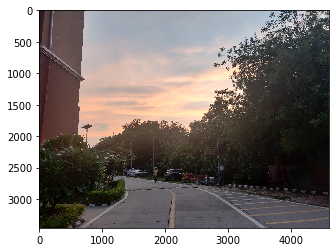

In [37]:
plt.imshow(targetimg)

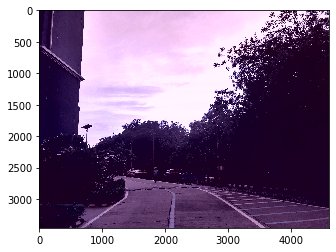

In [38]:
plt.imshow(resultimg)